# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
748551# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL

# # I tried running the code using the assigned name to the API key but code it is not working. So, I am trusting you with my API key, please do not share with your friends Thanks!
url = "https://api.openweathermap.org/data/2.5/weather"
# url = "https://api.openweathermap.org/data/2.5/weather?lat=33.44&lon=-94.04&appid=c27eb05c3bf6b5ef6609ee2a5d2710d3"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    # city_url = # YOUR CODE HERE
    # city_url = url + "?lat={lat_lngs[i][0]}&lon={lat_lngs[i][1]}&appid=c27eb05c3bf6b5ef6609ee2a5d2710d3"
    # lat_long_list = list(lat_lngs[i])
    
    params = {
        "lat":city.lat,
        "lon":city.lng,
        "appid": "c27eb05c3bf6b5ef6609ee2a5d2710d3",
    }
    response = requests.get(url, params=params)
    response = response.json()
    # print(response)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city.city_name))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']
        # print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        #print(city_lat)
                            
        city_lng = response['coord']['lon']
        #print(city_lng)
                        
        city_max_temp =  response['main']['temp_max']
        #print(city_max_temp)

        city_humidity = response['main']['humidity']
        #print(city_humidity)

        city_clouds = response['clouds']
        #print(city_clouds)

        city_wind = response['wind']
        #print(city_wind)

        city_country = response['sys']['country']
        #print(city_country)

        city_date = response['dt']   ## convert time stamp into date
        #print(city_date )

        # Append the City information into city_data list
        # # This piece of code is converting the data into an dictionary array
        city_data.append({"City": city.city_name, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds['all'],
                "Wind Speed": city_wind['speed'],
                "Country": city_country,
                "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vecpiebalga
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | aguazul
Processing Record 6 of Set 1 | acarau
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | torteval
Processing Record 10 of Set 1 | brisas de zicatela
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | sinabang
Processing Record 13 of Set 1 | paoua
Processing Record 14 of Set 1 | chibougamau
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | alderetes
Processing Record 19 of Set 1 | selfoss
Processing Record 20 of Set 1 | tindouf
Processing Record 21 of Set 1 | gisborne
Processing Record 22 of Set 1 | thompson
Processing 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
# # Used this link to convert a dictionary array to a pandas df: https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,284.72,89,94,1.34,NZ,1686622168
1,vecpiebalga,57.0609,25.8162,281.50,76,2,2.10,LV,1686622169
2,adamstown,-25.0660,-130.1015,293.56,64,28,3.45,PN,1686622169
3,namibe,-15.1961,12.1522,289.02,80,4,1.59,AO,1686622169
4,aguazul,5.1728,-72.5471,296.89,95,99,1.00,CO,1686622169


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,89,94,1.34,NZ,1686622168
1,vecpiebalga,57.0609,25.8162,281.50,76,2,2.10,LV,1686622169
2,adamstown,-25.0660,-130.1015,293.56,64,28,3.45,PN,1686622169
3,namibe,-15.1961,12.1522,289.02,80,4,1.59,AO,1686622169
4,aguazul,5.1728,-72.5471,296.89,95,99,1.00,CO,1686622169


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

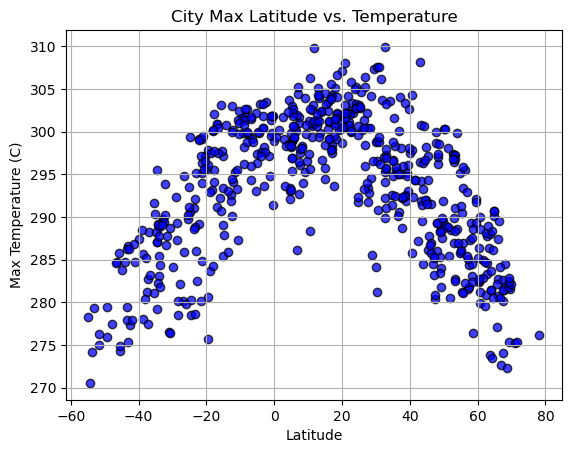

In [15]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']

y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

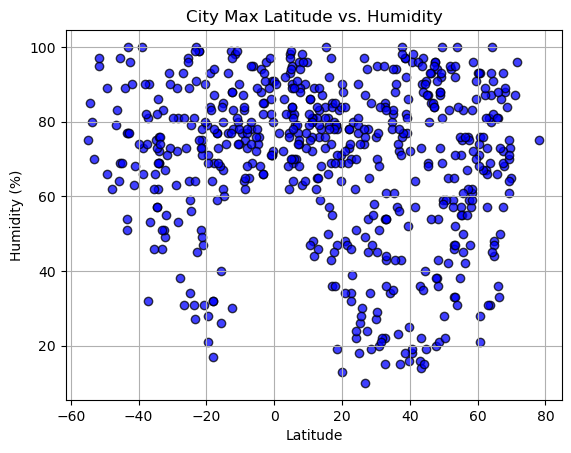

In [16]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']

y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

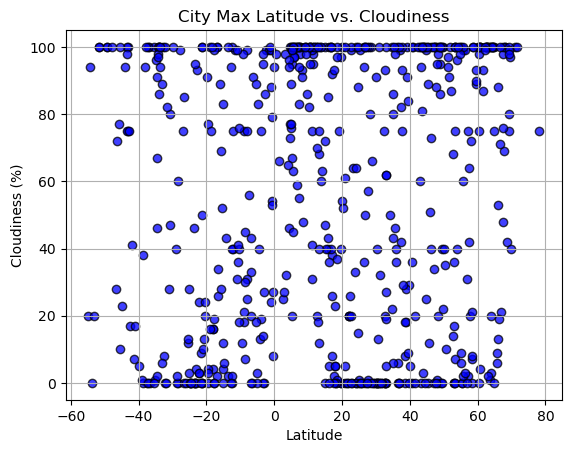

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']

y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

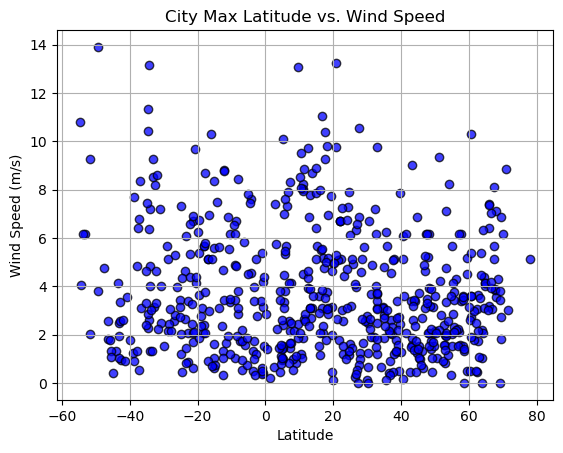

In [18]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']

y_axis = city_data_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Not very sure what to do in here, but you can find below the caculations for linear regression for each conditions

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df.Lat >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vecpiebalga,57.0609,25.8162,281.50,76,2,2.10,LV,1686622169
4,aguazul,5.1728,-72.5471,296.89,95,99,1.00,CO,1686622169
8,torteval,49.4333,-2.6500,287.58,100,40,2.06,GG,1686622170
9,brisas de zicatela,15.8369,-97.0419,303.44,66,40,1.54,MX,1686622171
10,yellowknife,62.4541,-114.3725,280.87,67,100,3.04,CA,1686622171


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df.Lat < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.72,89,94,1.34,NZ,1686622168
2,adamstown,-25.0660,-130.1015,293.56,64,28,3.45,PN,1686622169
3,namibe,-15.1961,12.1522,289.02,80,4,1.59,AO,1686622169
5,acarau,-2.8877,-40.1183,298.22,85,0,5.11,BR,1686622106
6,port elizabeth,-33.9611,25.6149,285.37,72,100,1.34,ZA,1686622170


###  Temperature vs. Latitude Linear Regression Plot

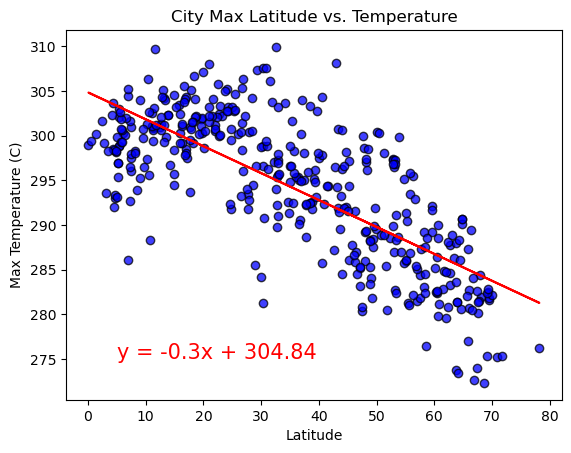

The r-value is: -0.7533040968474094


In [21]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']

y_axis = northern_hemi_df['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(5,275),fontsize=15,color="red")
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig5.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

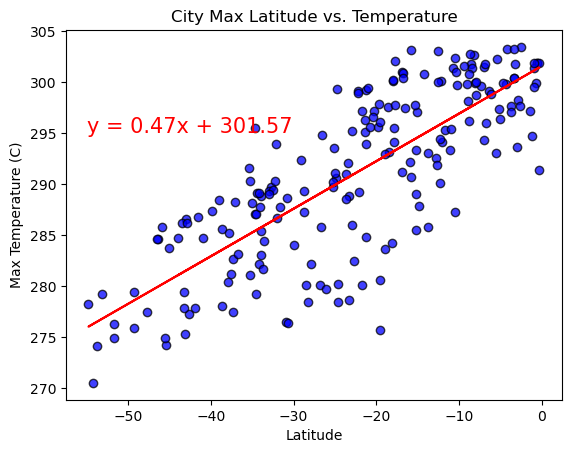

The r-value is: 0.7923389224279377


In [22]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']

y_axis = southern_hemi_df['Max Temp']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,295),fontsize=15,color="red")
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig6.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Based on the figures of linear regression from above, I can conclude that the data sets can estimate where the unmeasured data points might end up, if more data is collected in the future.  
Linear regression in both data sets match with the data analyzed.

### Humidity vs. Latitude Linear Regression Plot

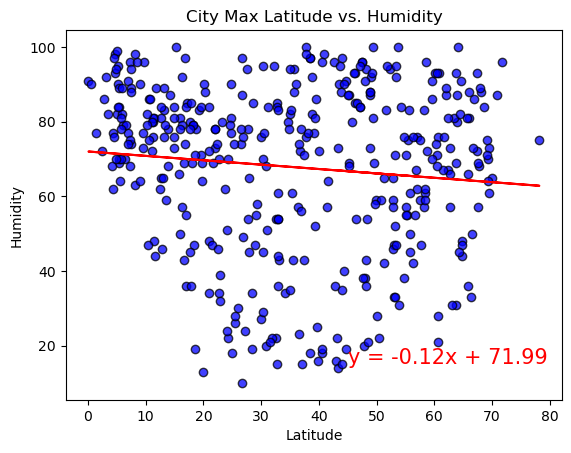

The r-value is: -0.10464329012554162


In [23]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']

y_axis = northern_hemi_df['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(45, 15),fontsize=15,color="red")
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig7.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

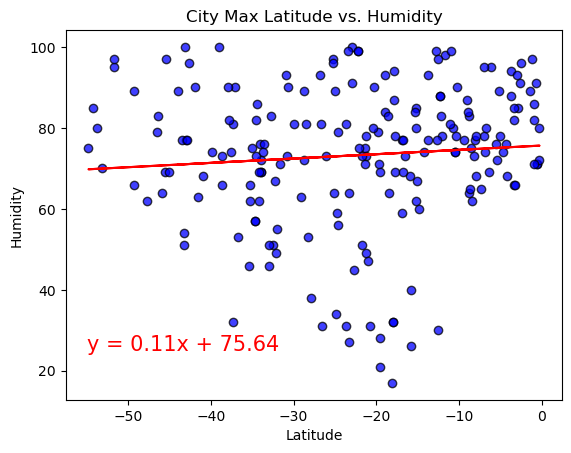

The r-value is: 0.08532307551563272


In [24]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']

y_axis = southern_hemi_df['Humidity']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig8.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In this case, we see the same trend being repeated as latitude and max temperatures. Linear regression in both data sets match with the data analyzed.


### Cloudiness vs. Latitude Linear Regression Plot

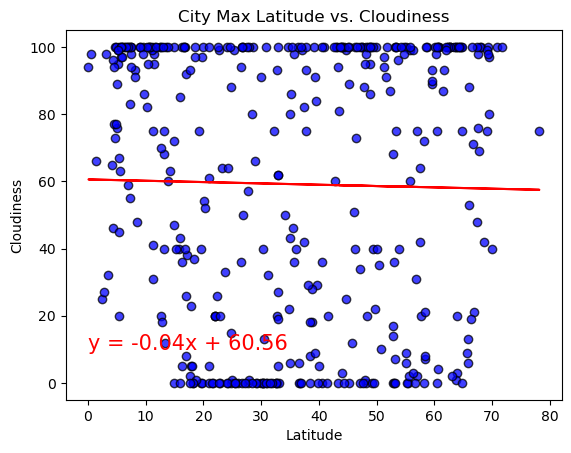

The r-value is: -0.0195068135689675


In [25]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']

y_axis = northern_hemi_df['Cloudiness']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig9.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

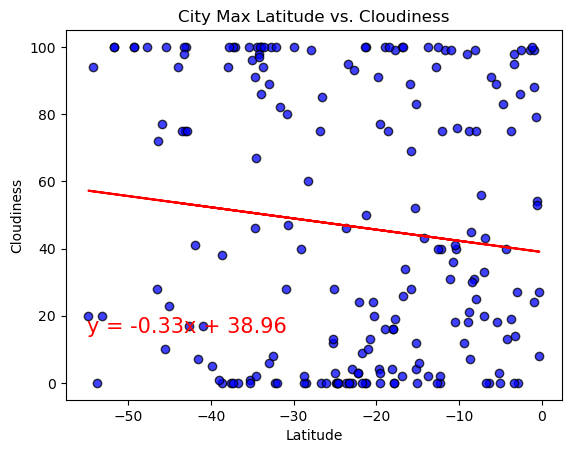

The r-value is: -0.11716758571238466


In [26]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']

y_axis = southern_hemi_df['Cloudiness']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig10.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

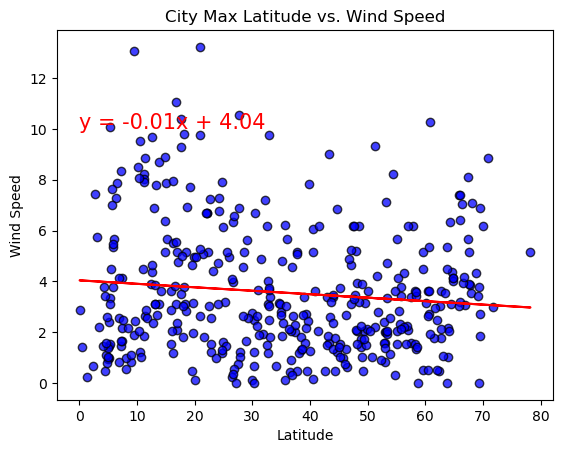

The r-value is: -0.10975867474411588


In [27]:
# Northern Hemisphere


# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']

y_axis = northern_hemi_df['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig11.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

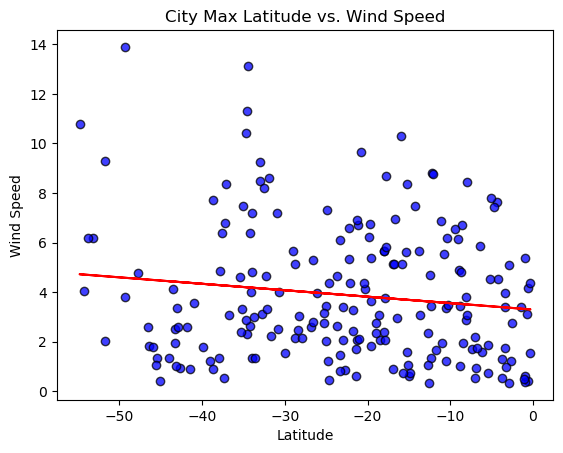

The r-value is: -0.1350843309345583


In [28]:
# Southern Hemisphere


# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']

y_axis = southern_hemi_df['Wind Speed']

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
## slope, intercept, etc, are the returning values obtained from linregress(x_values, y_values)

# Calculating linear regression
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plots 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")

# Incorporate the other graph properties
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig12.png")

# Show plot
plt.show()

print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE